In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import os
from glob import glob
import pickle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **한글 설정**

In [ ]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

!apt-get update -qq
!apt-get install fonts-nanum* -qq

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

fm._rebuild()

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

sys_font number: 48
nanum_font number: 31
Python 3.7.13
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0
NanumGothic Eco


## **초기 데이터 생성**

In [ ]:
seo = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/code/서성서성 서재완/df29.csv')
min = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/code/민달팽이 민시온/29_57까지.csv')
park = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/변수마지막.csv')

In [ ]:
main=pd.concat([seo, min, park],axis=1)
main

,인허가일자,소재지수정,사업장명,다중이용업소여부,시설총규모,추정임대료,가맹여부,업종분류,인허가년도,인허가분기,...,건수당_매출_금액_x,점포수_x,유사_업종_점포_수_x,프랜차이즈_점포_수_x,개업_율_x,폐업_률_x,선행종합지수(2015=100),전국,소비자심리지수,소기업
0,2017-01-02,서울특별시 중구 을지로6가 18-12,면면,0,29.88,1.129464e+09,0,한식음식점,2017,1,...,30326.244390,5.613128,5.303305,2.995732,1.098612,1.098612,107.2,97.632,94.0,4.60
1,2017-01-02,서울특별시 용산구 이태원동 44-17,메그놀리아디자인카페,0,72.99,7.554465e+08,0,커피-음료,2017,1,...,9113.702461,4.543295,3.970292,2.079442,2.708050,1.609438,107.2,97.632,94.0,4.60
2,2017-01-02,서울특별시 성동구 행당동 286-43,백채왕십리역점,0,36.61,3.060596e+08,1,한식음식점,2017,1,...,38822.565563,2.772589,2.484907,1.386294,2.302585,0.000000,107.2,97.632,94.0,4.60
3,2017-01-02,서울특별시 성동구 성수동2가 289-5,우리푸드,0,126.46,1.018635e+09,0,한식음식점,2017,1,...,30775.541188,5.356586,4.882802,2.833213,0.693147,1.098612,107.2,97.632,94.0,4.60
4,2017-01-02,서울특별시 동대문구 장안동 374-1,일촌김밥분식,0,47.94,4.268578e+08,0,한식음식점,2017,1,...,34206.583541,4.143135,3.526361,0.693147,0.000000,1.386294,107.2,97.632,94.0,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56720,2021-12-30,서울특별시 강동구 명일동 326-11,주식회사더크레스트명일지점,1,153.75,9.412575e+08,0,한식음식점,2021,4,...,32015.186100,3.610918,3.044522,0.000000,0.000000,0.000000,127.7,104.040,104.0,3.25
56721,2021-12-30,서울특별시 강동구 강일동 679-3,곽만근족발슈바인학센강일고덕점,0,37.24,2.267916e+08,1,한식음식점,2021,4,...,26388.182323,4.521789,3.688879,2.197225,1.386294,2.197225,127.7,104.040,104.0,3.25
56722,2021-12-31,서울특별시 강남구 신사동 648-4,마일하이(Milehigh),1,163.11,2.815279e+09,0,양식음식점,2021,4,...,146946.715131,2.772589,3.044522,0.000000,0.000000,0.000000,127.7,104.040,104.0,3.25
56723,2021-12-31,서울특별시 강남구 신사동 644-6,우모크,1,342.66,3.382054e+09,0,한식음식점,2021,4,...,77133.856913,5.129899,4.369448,1.945910,0.693147,1.609438,127.7,104.040,104.0,3.25


In [ ]:
# 상권코드+배후지코드 합치고 상권여부 열 생성(상권이면 1 배후지면 0)
main['상권여부']=0
main.loc[main['상권코드'].isnull()==False,'상권여부'] = 1
main.loc[:,['상권코드','상권배후지 상권코드', '상권여부']]

,상권코드,상권배후지 상권코드,상권여부
0,2120037.0,NaN,1
1,NaN,2110082.0,0
2,2110112.0,NaN,1
3,2120052.0,NaN,1
4,2110229.0,NaN,1
...,...,...,...
56720,2111080.0,NaN,1
56721,NaN,2111088.0,0
56722,2120193.0,NaN,1
56723,2120193.0,NaN,1


In [ ]:
#겹치는거 1도 없는거 확인차
((main['상권코드'].isnull()==False).sum())+((main['상권배후지 상권코드'].isnull()==False).sum()).sum()

56725

In [ ]:
main.loc[main['상권코드'].isnull(),'상권코드']=0
main.loc[main['상권배후지 상권코드'].isnull(),'상권배후지 상권코드']=0

In [ ]:
main.loc[main['상권코드'].isnull(),'상권코드']=0
main.loc[main['상권배후지 상권코드'].isnull(),'상권코드']=0
main['상권코드'] = main['상권코드'] + main['상권배후지 상권코드']
main.drop(columns='상권배후지 상권코드', inplace=True)

In [ ]:
main.columns

Index(['인허가일자', '소재지수정', '사업장명', '다중이용업소여부', '시설총규모', '추정임대료', '가맹여부', '업종분류',
       '인허가년도', '인허가분기', '사업기간', '폐업1년이내', '폐업3년이내', '폐업여부', '코로나여부', '상권코드',
       '시군구코드', '상권변화_지표명', '상권구분_코드명', '행정동코드', '집객시설_수', '시군구', '행정동',
       '상권여부', '현재영업여부', 'Unnamed: 0', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수',
       '숙박_시설_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수',
       '아파트_단지_수', '의료기관_수', '교육기관_수', '대학교_유무', '백화점_유무', '청년층_생활인구',
       '중년층_생활인구', '노년층_생활인구', '생활인구_연령_대표', '생활인구_성별_비', 'Unnamed: 0',
       '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '상주인구_연령_대표', '총 가구 수', '거주_유형_비',
       '점포당_매출_금액_x', '건수당_매출_금액_x', '점포수_x', '유사_업종_점포_수_x', '프랜차이즈_점포_수_x',
       '개업_율_x', '폐업_률_x', '선행종합지수(2015=100)', '전국', '소비자심리지수', '소기업'],
      dtype='object')

In [ ]:
main.pop('Unnamed: 0')
main.pop('청년층_생활인구')
main.pop('중년층_생활인구')
main.pop('노년층_생활인구')

0        319634.5
1             NaN
2        105177.5
3        182287.0
4        330192.5
           ...   
56720    163667.5
56721    301569.5
56722     80474.5
56723     80474.5
56724    771811.0
Name: 노년층_생활인구, Length: 56725, dtype: float64

## **결측치**

In [ ]:
main_no=main.copy()
main_no[main_no.isnull().T.sum()==31]
noind=main_no[main_no.isnull().T.sum()!=31].index # 6709행 식별
main_no=main_no.iloc[noind,:]

In [ ]:
main_no.columns=['인허가일자', '소재지수정', '사업장명', '다중이용업소여부', '시설총규모', '추정임대료', '가맹여부', '업종분류',
       '인허가년도', '인허가분기', '사업기간', '폐업1년이내', '폐업3년이내', '폐업여부', '코로나여부', '상권코드',
       '시군구코드', '상권변화_지표명', '상권구분_코드명', '행정동코드', '집객시설_수', '시군구', '행정동',
       '상권여부', '현재영업여부', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수',
       '의료기관_수', '교육기관_수', '대학교_유무', '백화점_유무', '생활인구_연령_대표', '생활인구_성별_비',
       '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '상주인구_연령_대표', '총 가구 수', '거주_유형_비',
       '점포당_매출_금액', '건수당_매출_금액', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수',
       '개업_율', '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리']

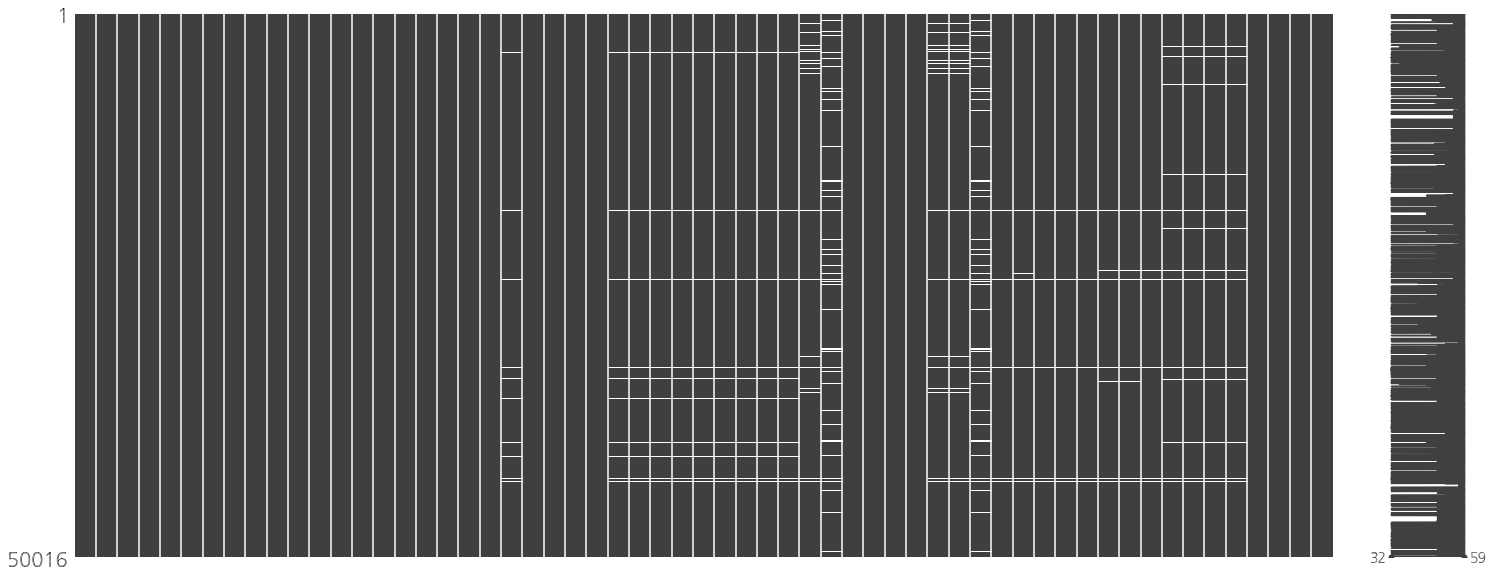

In [ ]:
#결측치 분포 개형
import missingno as msno
msno.matrix(main_no)

In [ ]:
main_no.index=range(len(main_no))

mice대체

In [ ]:
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
fcol=[ '다중이용업소여부', '시설총규모', '추정임대료', '가맹여부', 
       '인허가년도', '인허가분기', '사업기간', '폐업1년이내', '폐업3년이내', '폐업여부', '코로나여부', '상권코드',
       '시군구코드', '행정동코드', '집객시설_수',
       '상권여부', '현재영업여부', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수',
       '의료기관_수', '교육기관_수', '대학교_유무', '백화점_유무',  '생활인구_성별_비',
       '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '총 가구 수', '거주_유형_비',
       '점포당_매출_금액', '건수당_매출_금액', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율',
       '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리']

In [ ]:
#mice대체
main_nooo=main_no.copy()
main_nooo=main_nooo.loc[:,fcol]
main_nooo = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(main_nooo))
main_nooo.columns=fcol

In [ ]:
main_nooo.dtypes

다중이용업소여부      float64
시설총규모         float64
추정임대료         float64
가맹여부          float64
인허가년도         float64
인허가분기         float64
사업기간          float64
폐업1년이내        float64
폐업3년이내        float64
폐업여부          float64
코로나여부         float64
상권코드          float64
시군구코드         float64
행정동코드         float64
집객시설_수        float64
상권여부          float64
현재영업여부        float64
관공서_수         float64
은행_수          float64
슈퍼마켓_수        float64
극장_수          float64
숙박_시설_수       float64
철도_역_수        float64
버스_터미널_수      float64
지하철_역_수       float64
버스_정거장_수      float64
총_생활인구_수      float64
아파트_단지_수      float64
의료기관_수        float64
교육기관_수        float64
대학교_유무        float64
백화점_유무        float64
생활인구_성별_비     float64
아파트_평당_가격     float64
총 상주인구 수      float64
상주인구_성별_비     float64
총 가구 수        float64
거주_유형_비       float64
점포당_매출_금액     float64
건수당_매출_금액     float64
점포수           float64
유사_업종_점포_수    float64
프랜차이즈_점포_수    float64
개업_율          float64
폐업_률          float64
선행종합지수    

In [ ]:
main_nooo.columns

Index(['다중이용업소여부', '시설총규모', '추정임대료', '가맹여부', '인허가년도', '인허가분기', '사업기간',
       '폐업1년이내', '폐업3년이내', '폐업여부', '코로나여부', '상권코드', '시군구코드', '행정동코드', '집객시설_수',
       '상권여부', '현재영업여부', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수',
       '의료기관_수', '교육기관_수', '대학교_유무', '백화점_유무', '생활인구_성별_비', '아파트_평당_가격',
       '총 상주인구 수', '상주인구_성별_비', '총 가구 수', '거주_유형_비', '점포당_매출_금액', '건수당_매출_금액',
       '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율', '폐업_률', '선행종합지수', '소비자물가지수',
       '소비자심리지수', '중소기업대출금리'],
      dtype='object')

In [ ]:
main_nooo = pd.concat([main_nooo,main_no.iloc[:,[0,1,2,7,17,18,21,22,40,45]]],axis=1)

In [ ]:
main_nooo

,다중이용업소여부,시설총규모,추정임대료,가맹여부,인허가년도,인허가분기,사업기간,폐업1년이내,폐업3년이내,폐업여부,...,인허가일자,소재지수정,사업장명,업종분류,상권변화_지표명,상권구분_코드명,시군구,행정동,생활인구_연령_대표,상주인구_연령_대표
0,0.0,29.88,1.129464e+09,0.0,2017.0,1.0,569.0,0.0,1.0,1.0,...,2017-01-02,서울특별시 중구 을지로6가 18-12,면면,한식음식점,정체,발달상권,중구,을지로6가,청년층,노년층
1,0.0,72.99,7.554465e+08,0.0,2017.0,1.0,457.0,0.0,1.0,1.0,...,2017-01-02,서울특별시 용산구 이태원동 44-17,메그놀리아디자인카페,커피-음료,정체,골목상권,용산구,이태원동,NaN,노년층
2,0.0,36.61,3.060596e+08,1.0,2017.0,1.0,2005.0,0.0,0.0,0.0,...,2017-01-02,서울특별시 성동구 행당동 286-43,백채왕십리역점,한식음식점,상권확장,골목상권,성동구,행당동,노년층,중장년층/자녀
3,0.0,126.46,1.018635e+09,0.0,2017.0,1.0,2005.0,0.0,0.0,0.0,...,2017-01-02,서울특별시 성동구 성수동2가 289-5,우리푸드,한식음식점,상권확장,발달상권,성동구,성수동2가,청년층,청년층
4,0.0,47.94,4.268578e+08,0.0,2017.0,1.0,261.0,1.0,1.0,1.0,...,2017-01-02,서울특별시 동대문구 장안동 374-1,일촌김밥분식,한식음식점,정체,골목상권,동대문구,장안동,노년층,중장년층/자녀
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50011,1.0,153.75,9.412575e+08,0.0,2021.0,4.0,182.0,0.0,0.0,0.0,...,2021-12-30,서울특별시 강동구 명일동 326-11,주식회사더크레스트명일지점,한식음식점,다이나믹,골목상권,강동구,명일동,노년층,노년층
50012,0.0,37.24,2.267916e+08,1.0,2021.0,4.0,182.0,0.0,0.0,0.0,...,2021-12-30,서울특별시 강동구 강일동 679-3,곽만근족발슈바인학센강일고덕점,한식음식점,다이나믹,골목상권,강동구,강일동,노년층,중장년층/자녀
50013,1.0,163.11,2.815279e+09,0.0,2021.0,4.0,181.0,0.0,0.0,0.0,...,2021-12-31,서울특별시 강남구 신사동 648-4,마일하이(Milehigh),양식음식점,다이나믹,발달상권,강남구,신사동,청년층,청년층
50014,1.0,342.66,3.382054e+09,0.0,2021.0,4.0,181.0,0.0,0.0,0.0,...,2021-12-31,서울특별시 강남구 신사동 644-6,우모크,한식음식점,다이나믹,발달상권,강남구,신사동,청년층,청년층


In [ ]:
main_nooo.isnull().sum()/len(main_nooo)

다중이용업소여부      0.000000
시설총규모         0.000000
추정임대료         0.000000
가맹여부          0.000000
인허가년도         0.000000
인허가분기         0.000000
사업기간          0.000000
폐업1년이내        0.000000
폐업3년이내        0.000000
폐업여부          0.000000
코로나여부         0.000000
상권코드          0.000000
시군구코드         0.000000
행정동코드         0.000000
집객시설_수        0.000000
상권여부          0.000000
현재영업여부        0.000000
관공서_수         0.000000
은행_수          0.000000
슈퍼마켓_수        0.000000
극장_수          0.000000
숙박_시설_수       0.000000
철도_역_수        0.000000
버스_터미널_수      0.000000
지하철_역_수       0.000000
버스_정거장_수      0.000000
총_생활인구_수      0.000000
아파트_단지_수      0.000000
의료기관_수        0.000000
교육기관_수        0.000000
대학교_유무        0.000000
백화점_유무        0.000000
생활인구_성별_비     0.000000
아파트_평당_가격     0.000000
총 상주인구 수      0.000000
상주인구_성별_비     0.000000
총 가구 수        0.000000
거주_유형_비       0.000000
점포당_매출_금액     0.000000
건수당_매출_금액     0.000000
점포수           0.000000
유사_업종_점포_수    0.000000
프랜차이즈_점포_수    0.000000
개업_율       

In [ ]:
main_nooo=main_nooo.dropna()

In [ ]:
main_nooo.shape

(47932, 59)

In [ ]:
main_nooo.to_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/모델링용 최종본/이상_x_스케일_x_mice_o.csv')

그룹별 평균 대체

In [ ]:
main_no.groupby(['인허가년도','인허가분기','행정동','상권여부','업종분류']).mean()

다중이용업소여부      시설총규모         추정임대료      가맹여부  \
인허가년도 인허가분기 행정동  상권여부 업종분류                                                 
2017  1     가락동  1    기타         0.25  56.247500  5.378066e+08  0.250000   
                      분식전문점      0.00  60.920000  8.399320e+08  0.500000   
                      한식음식점      0.00  75.623333  6.387999e+08  0.333333   
            가리봉동 1    중식음식점      0.00  41.265000  2.004440e+08  0.000000   
                      한식음식점      0.00  48.040000  2.028924e+08  0.000000   
...                               ...        ...           ...       ...   
2021  4     휘경동  1    기타         0.00  30.000000  7.050000e+07  0.000000   
                      한식음식점      0.00  49.500000  1.361250e+08  0.000000   
            흑석동  0    기타         0.00  20.540000  2.818088e+08  0.000000   
                 1    기타         0.00  53.220000  2.828111e+08  0.000000   
            흥인동  1    기타         0.00  45.820000  3.864459e+08  0.000000   

                                    사업기간  폐업1년이내  폐업3년이내  폐업여부  코로나여부  \
인허가년도 인허가분기 행정동  상권여부 업종분류                                              
2017  1     가락동  1    기타     1656.250000     0.0    0.25  0.25    0.0   
                      분식전문점   978.500000     0.5    0.50  1.00    0.0   
                      한식음식점  1950.666667     0.0    0.00  0.00    0.0   
            가리봉동 1    중식음식점   950.000000     0.0    0.50  1.00    0.0   
                      한식음식점  1053.500000     0.5    0.50  1.00    0.0   
...                                  ...     ...     ...   ...    ...   
2021  4     휘경동  1    기타      184.000000     0.0    0.00  0.00    1.0   
                      한식음식점   237.000000     0.0    0.00  0.00    1.0   
            흑석동  0    기타      240.000000     0.0    0.00  0.00    1.0   
                 1    기타      196.000000     0.0    0.00  0.00    1.0   
            흥인동  1    기타      173.000000     1.0    1.00  1.00    1.0   

                                   상권코드  ...     건수당_매출_금액       점포수  \
인허가년도 인허가분기 행정동  상권여부 업종분류               ...                           
2017  1     가락동  1    기타     2118155.25  ...  15659.276348  2.432740   
                      분식전문점  2120236.50  ...  11969.567726  3.457862   
                      한식음식점  2120234.00  ...  37458.739304  5.214936   
            가리봉동 1    중식음식점  2120131.00  ...  25597.871375  4.204693   
                      한식음식점  2115430.00  ...  31257.805481  5.290710   
...                                 ...  ...           ...       ...   
2021  4     휘경동  1    기타     2110232.00  ...  16901.380207  2.474435   
                      한식음식점  2110219.00  ...  33241.450516  3.891820   
            흑석동  0    기타     2110841.00  ...  16390.498839  3.459466   
                 1    기타     2110841.00  ...  35129.568027  1.386294   
            흥인동  1    기타     2120039.00  ...  18785.817693  3.972386   

                             유사_업종_점포_수  프랜차이즈_점포_수      개업_율      폐업_률  \
인허가년도 인허가분기 행정동  상권여부 업종분류                                                
2017  1     가락동  1    기타       2.136962    0.782101  0.778934  0.980617   
                      분식전문점    2.871502    1.589027  1.956012  0.804719   
                      한식음식점    4.927254    3.367296  1.098612  1.098612   
            가리봉동 1    중식음식점    3.583519    1.609438  0.000000  0.000000   
                      한식음식점    4.830867    2.851891  1.956012  1.844440   
...                                 ...         ...       ...       ...   
2021  4     휘경동  1    기타       1.909543    0.864997  0.000000  0.000000   
                      한식음식점    3.218876    1.609438  0.000000  1.609438   
            흑석동  0    기타       2.944439    1.435085  0.741937  2.116256   
                 1    기타       0.693147    0.000000  0.000000  0.000000   
            흥인동  1    기타       3.462258    1.673976  1.734601  1.134980   

                             선행종합지수  소비자물가지수  소비자심리지수  중소기업대출금리  
인허가년도 인허가분기 행정동  상권여부 업종분류                                       
2017  1     가락동  1    기타      107.2   97.632 

In [ ]:
null_col_list_numeric = ['집객시설_수', '관공서_수','은행_수','슈퍼마켓_수','극장_수','숙박_시설_수','철도_역_수','버스_터미널_수','지하철_역_수','버스_정거장_수','총_생활인구_수','아파트_단지_수','생활인구_성별_비','아파트_평당_가격','총 상주인구 수','총 가구 수','거주_유형_비','점포당_매출_금액','건수당_매출_금액','점포수','유사_업종_점포_수','프랜차이즈_점포_수','개업_율','폐업_률']
null_col_list_categoric = ['생활인구_연령_대표','상주인구_연령_대표']

In [ ]:
# 양적자료 변수 그룹화된 평균으로 결측치 대체 - first
for col in null_col_list_numeric:
  main_no[col].fillna(main_no.groupby(['인허가년도','인허가분기','행정동','상권여부','업종분류'])[col].transform('mean'),inplace=True)

In [ ]:
main_no.isnull().sum()/len(main_no) 

인허가일자         0.000000
소재지수정         0.000000
사업장명          0.000020
다중이용업소여부      0.000000
시설총규모         0.000000
추정임대료         0.000000
가맹여부          0.000000
업종분류          0.000000
인허가년도         0.000000
인허가분기         0.000000
사업기간          0.000000
폐업1년이내        0.000000
폐업3년이내        0.000000
폐업여부          0.000000
코로나여부         0.000000
상권코드          0.000000
시군구코드         0.000000
상권변화_지표명      0.000000
상권구분_코드명      0.000000
행정동코드         0.000000
집객시설_수        0.009517
시군구           0.000000
행정동           0.000000
상권여부          0.000000
현재영업여부        0.000000
관공서_수         0.009517
은행_수          0.009517
슈퍼마켓_수        0.009517
극장_수          0.009517
숙박_시설_수       0.009517
철도_역_수        0.009517
버스_터미널_수      0.009517
지하철_역_수       0.009517
버스_정거장_수      0.009517
총_생활인구_수      0.033569
아파트_단지_수      0.051184
의료기관_수        0.000000
교육기관_수        0.000000
대학교_유무        0.000000
백화점_유무        0.000000
생활인구_연령_대표    0.036548
생활인구_성별_비     0.033569
아파트_평당_가격     0.051184
총 상주인구 수   

In [ ]:
# 범주형 변수 인허가년도,인허가분기,상권여부 기준 최빈값으로 결측치 처리 >> 상권여부를 넣어도 리스트가 없는 것을 보아 결측치 대체를 하지 않고 그냥 제거하는게 좋을 것 같다.
#for col in null_col_list_categoric:
#  main_no[col].fillna(main_no.groupby(['인허가년도','인허가분기','상권여부'])[col].transform(lambda x: x.value_counts().idxmax()),inplace=True)

In [ ]:
main_no.shape # 제거전행개수 : 50016 개

(50016, 59)

In [ ]:
main_no = main_no.dropna()
main_no.shape

(45702, 59)

In [ ]:
main_no.isnull().sum()

인허가일자         0
소재지수정         0
사업장명          0
다중이용업소여부      0
시설총규모         0
추정임대료         0
가맹여부          0
업종분류          0
인허가년도         0
인허가분기         0
사업기간          0
폐업1년이내        0
폐업3년이내        0
폐업여부          0
코로나여부         0
상권코드          0
시군구코드         0
상권변화_지표명      0
상권구분_코드명      0
행정동코드         0
집객시설_수        0
시군구           0
행정동           0
상권여부          0
현재영업여부        0
관공서_수         0
은행_수          0
슈퍼마켓_수        0
극장_수          0
숙박_시설_수       0
철도_역_수        0
버스_터미널_수      0
지하철_역_수       0
버스_정거장_수      0
총_생활인구_수      0
아파트_단지_수      0
의료기관_수        0
교육기관_수        0
대학교_유무        0
백화점_유무        0
생활인구_연령_대표    0
생활인구_성별_비     0
아파트_평당_가격     0
총 상주인구 수      0
상주인구_성별_비     0
상주인구_연령_대표    0
총 가구 수        0
거주_유형_비       0
점포당_매출_금액     0
건수당_매출_금액     0
점포수           0
유사_업종_점포_수    0
프랜차이즈_점포_수    0
개업_율          0
폐업_률          0
선행종합지수        0
소비자물가지수       0
소비자심리지수       0
중소기업대출금리      0
dtype: int64

In [ ]:
main_no.columns

Index(['인허가일자', '소재지수정', '사업장명', '다중이용업소여부', '시설총규모', '추정임대료', '가맹여부', '업종분류',
       '인허가년도', '인허가분기', '사업기간', '폐업1년이내', '폐업3년이내', '폐업여부', '코로나여부', '상권코드',
       '시군구코드', '상권변화_지표명', '상권구분_코드명', '행정동코드', '집객시설_수', '시군구', '행정동',
       '상권여부', '현재영업여부', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수',
       '의료기관_수', '교육기관_수', '대학교_유무', '백화점_유무', '생활인구_연령_대표', '생활인구_성별_비',
       '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '상주인구_연령_대표', '총 가구 수', '거주_유형_비',
       '점포당_매출_금액', '건수당_매출_금액', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율',
       '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리'],
      dtype='object')

In [ ]:
main_no.index = range(len(main_no))

In [ ]:
no_outscal=main_no.copy()

In [ ]:
no_outscal = no_outscal[['행정동', '인허가일자', '상권코드', '사업장명', '시군구코드', '행정동코드', '소재지수정','폐업여부','사업기간','현재영업여부', #빼야하는 애들
                     '인허가분기', '인허가년도','다중이용업소여부','철도_역_수', '버스_터미널_수','가맹여부','코로나여부','상권여부','대학교_유무', 
                     '백화점_유무','폐업1년이내','폐업3년이내','시설총규모', '추정임대료','집객시설_수', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
                     '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수', '의료기관_수', '교육기관_수', '생활인구_성별_비','아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '총 가구 수', 
                     '거주_유형_비', '점포당_매출_금액', '건수당_매출_금액', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율',
                     '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리',#양적변수
                     '업종분류', '상권변화_지표명', '상권구분_코드명', '시군구', '생활인구_연령_대표', '상주인구_연령_대표']]#범주형변수

In [ ]:
no_outscal.to_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/모델링용 최종본/이상_x_스케일_x.csv')

## **전처리 전 MI확인**

In [ ]:
#skew진행해야 하는 변수 확인
main_no.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


다중이용업소여부       2.997956
시설총규모         13.449429
추정임대료         28.228911
가맹여부           1.597315
인허가년도         -0.049378
인허가분기          0.004340
사업기간           0.430462
폐업1년이내         2.461626
폐업3년이내         1.057755
폐업여부           0.852168
코로나여부          0.422323
상권코드          -9.966076
시군구코드         -0.252383
행정동코드         -0.252406
집객시설_수         2.957928
상권여부          -2.627680
현재영업여부        -0.852168
관공서_수          1.821551
은행_수           2.898626
슈퍼마켓_수         6.045800
극장_수           5.882967
숙박_시설_수        3.989712
철도_역_수        14.075766
버스_터미널_수      18.332969
지하철_역_수        2.013637
버스_정거장_수       2.801730
총_생활인구_수       2.042962
아파트_단지_수       3.035444
의료기관_수         2.445993
교육기관_수         3.669839
대학교_유무         3.893492
백화점_유무         4.918831
생활인구_성별_비      1.695264
아파트_평당_가격      1.678923
총 상주인구 수       2.398508
상주인구_성별_비      4.545768
총 가구 수         2.086764
거주_유형_비       15.139107
점포당_매출_금액      3.570869
건수당_매출_금액     22.547959
점포수            0.152815
유사_업종_점포_수     0

In [ ]:
X = main_no.copy()
y = X.pop("폐업3년이내")
X.pop("폐업1년이내")
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

사업장명          0.611802
소재지수정         0.336281
상주인구_성별_비     0.034936
총 상주인구 수      0.029266
인허가일자         0.019609
점포당_매출_금액     0.018230
시설총규모         0.016398
거주_유형_비       0.014096
숙박_시설_수       0.009878
시군구코드         0.007060
인허가분기         0.005659
버스_정거장_수      0.005373
상권구분_코드명      0.003639
상주인구_연령_대표    0.003019
폐업_률          0.002423
다중이용업소여부      0.001999
교육기관_수        0.001224
관공서_수         0.000734
유사_업종_점포_수    0.000203
Name: MI Scores, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

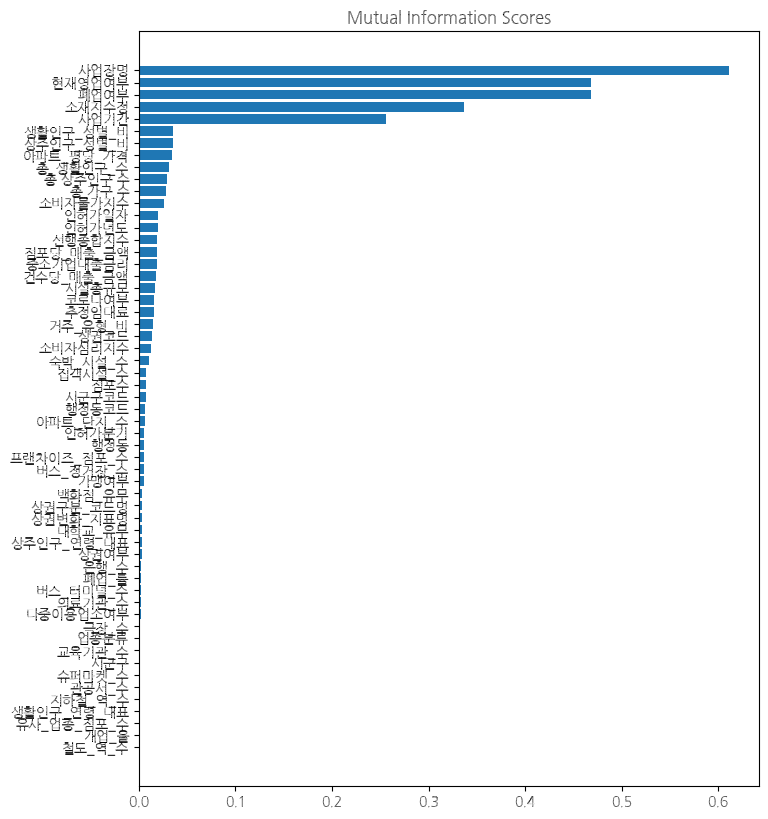

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_scores)

In [ ]:
X = main_nooo.copy()
y = X.pop("폐업3년이내")
X.pop("폐업1년이내")
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

사업장명          0.606700
소재지수정         0.318361
생활인구_성별_비     0.031805
총 상주인구 수      0.029221
소비자물가지수       0.023241
건수당_매출_금액     0.020576
코로나여부         0.015629
추정임대료         0.014988
행정동           0.011867
행정동코드         0.006710
집객시설_수        0.005986
폐업_률          0.004217
유사_업종_점포_수    0.003864
가맹여부          0.002500
다중이용업소여부      0.000726
극장_수          0.000000
관공서_수         0.000000
인허가분기         0.000000
지하철_역_수       0.000000
Name: MI Scores, dtype: float64

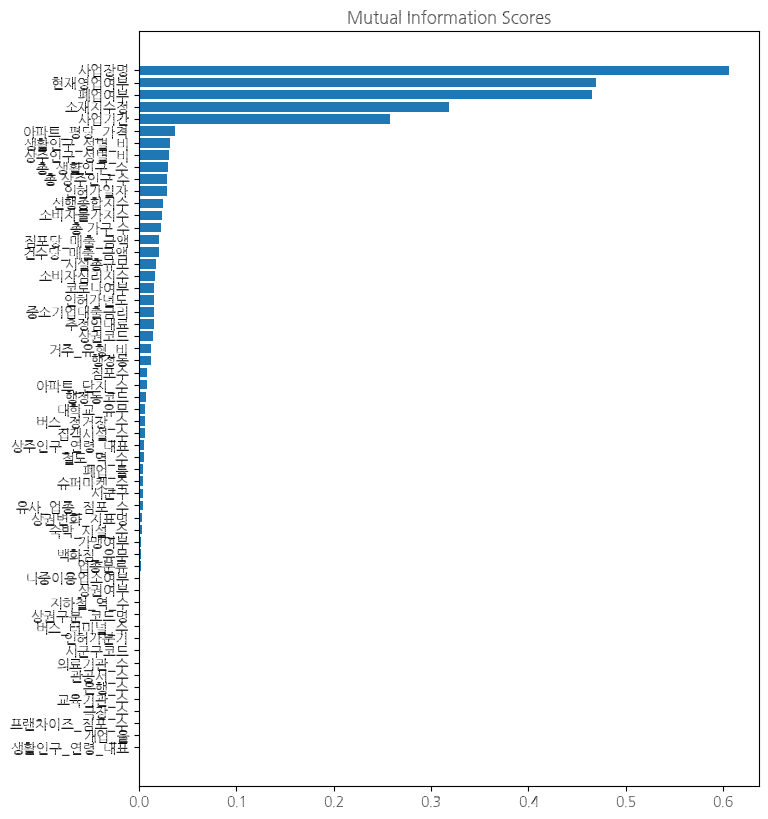

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_scores)

## **이상치 판단**

In [ ]:
main_out = main_no.copy()

In [ ]:
skew_list=['시설총규모', '추정임대료', 
       '사업기간','집객시설_수', 
       '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수',
       '의료기관_수', '교육기관_수', '생활인구_성별_비',
       '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '총 가구 수', '거주_유형_비',
       '점포당_매출_금액', '건수당_매출_금액', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율',
       '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리']

In [ ]:
main_out.loc[:,skew_list].skew()
#skew가 10 이상인건 너무 비정상적인 수치
#이런경우 로그 취했을때도 튈 수 있음

시설총규모         13.449429
추정임대료         28.228911
사업기간           0.430462
집객시설_수         2.957928
관공서_수          1.821551
은행_수           2.898626
슈퍼마켓_수         6.045800
극장_수           5.882967
숙박_시설_수        3.989712
지하철_역_수        2.013637
버스_정거장_수       2.801730
총_생활인구_수       2.042962
아파트_단지_수       3.035444
의료기관_수         2.445993
교육기관_수         3.669839
생활인구_성별_비      1.695264
아파트_평당_가격      1.678923
총 상주인구 수       2.398508
상주인구_성별_비      4.545768
총 가구 수         2.086764
거주_유형_비       15.139107
점포당_매출_금액      3.570869
건수당_매출_금액     22.547959
점포수            0.152815
유사_업종_점포_수     0.171018
프랜차이즈_점포_수     0.601101
개업_율           0.047878
폐업_률           0.119754
선행종합지수         0.615789
소비자물가지수        0.827858
소비자심리지수       -0.750841
중소기업대출금리       0.475899
dtype: float64

In [ ]:
li=[]
for i in range(len(skew_list)):
  target=main_out.loc[:,skew_list[i]]
  des=target.describe()
  bound=[des[1]-des[2]*4, des[1]+des[2]*4]
  outlier=target[(target>=bound[1]).astype(int)+(target<=bound[0]).astype(int)>0]
  print(len(outlier))

347
303
0
556
187
648
302
661
902
271
431
287
339
588
870
282
323
449
730
413
241
393
220
0
0
0
0
4
0
0
0
0


In [ ]:
li=[]
for i in range(len(skew_list)):
  target=main_out.loc[:,skew_list[i]]
  des=target.describe()
  bound=[des[1]-des[2]*4, des[1]+des[2]*4]
  outlier=target[(target>=bound[1]).astype(int)+(target<=bound[0]).astype(int)>0]
  li.append(outlier.index)

시설총규모 이상치 확인

In [ ]:
main_out.loc[main_out.index.isin(li[0]),['시설총규모','추정임대료','아파트_평당_가격','업종분류','가맹여부']].head(50)

,시설총규모,추정임대료,아파트_평당_가격,업종분류,가맹여부
562,741.00,1.819155e+10,4.555097e+06,기타,0
601,639.49,1.089051e+10,3.305486e+06,기타,0
730,492.13,1.446862e+10,4.476200e+06,한식음식점,0
731,522.89,1.537297e+10,4.476200e+06,한식음식점,0
757,580.00,1.409400e+10,6.896796e+06,한식음식점,0
786,1135.40,7.249529e+09,2.226310e+06,기타,0
832,531.75,1.962158e+10,5.020987e+06,한식음식점,0
1115,652.90,1.111889e+10,3.305486e+06,중식음식점,0
1396,836.01,1.304176e+10,4.190172e+06,한식음식점,0
1671,1256.49,1.423603e+10,2.100325e+06,기타,1


In [ ]:
main_out.loc[:,['시설총규모','추정임대료','아파트_평당_가격','업종분류','가맹여부']].head(50)

,시설총규모,추정임대료,아파트_평당_가격,업종분류,가맹여부
0,29.88,1.129464e+09,2.705980e+06,한식음식점,0
1,36.61,3.060596e+08,2.653803e+06,한식음식점,1
2,126.46,1.018635e+09,3.335889e+06,한식음식점,0
3,47.94,4.268578e+08,2.862806e+06,한식음식점,0
4,20.00,8.400000e+07,2.838501e+06,한식음식점,0
5,56.27,2.591234e+08,2.222754e+06,기타,0
6,34.46,1.730926e+08,2.270940e+06,한식음식점,1
7,35.00,1.319500e+08,1.861573e+06,양식음식점,0
8,49.00,1.521450e+08,2.077529e+06,한식음식점,0
9,33.00,9.916500e+07,2.401161e+06,분식전문점,0


In [ ]:
l=[]
for i in range(len(li)):
  for j in range(len(li[i])):
    l.append(j)


In [ ]:
len(l)

9747

In [ ]:
for i in range(len(skew_list)):
  target=main_out.loc[:,skew_list[i]]
  des=target.describe()
  bound=[des[1]-des[2]*4, des[1]+des[2]*4]
  outlier=target[(target>=bound[1]).astype(int)>0]
  print(len(outlier))

#하한쪽 아웃라이어 극히 소수
#상방쪽만 다룬다

347
303
0
556
187
648
302
661
902
271
431
287
339
588
870
282
323
449
727
413
241
393
220
0
0
0
0
4
0
0
0
0


In [ ]:
#평균+표준편차*4의 바운드를 생성 -> 바운드 밖의 값 상한으로 대체
for i in range(len(skew_list)):
  target=main_out.loc[:,skew_list[i]]
  des=target.describe()
  bound=des[1]+des[2]*4
  outlier=target[(target>=bound)]
  main_out.loc[target>=bound,skew_list[i]]=outlier.min()


In [ ]:
#skew재확인 -> 철도역과 버스터미널만 10 오바됨 -> 012/01로 극단적 치우침, skew대상서 제외
main_out.loc[:,skew_list].skew()

시설총규모         3.009466
추정임대료         4.627816
사업기간          0.430462
집객시설_수        2.177824
관공서_수         1.708344
은행_수          2.517330
슈퍼마켓_수        3.044284
극장_수          4.102894
숙박_시설_수       3.244324
지하철_역_수       1.911114
버스_정거장_수      2.157158
총_생활인구_수      1.731006
아파트_단지_수      2.121314
의료기관_수        2.029754
교육기관_수        2.995290
생활인구_성별_비     1.558759
아파트_평당_가격     1.373134
총 상주인구 수      2.024670
상주인구_성별_비     2.788360
총 가구 수        1.753750
거주_유형_비       6.736883
점포당_매출_금액     1.725830
건수당_매출_금액     2.487052
점포수           0.152815
유사_업종_점포_수    0.171018
프랜차이즈_점포_수    0.601101
개업_율          0.047878
폐업_률          0.119312
선행종합지수        0.615789
소비자물가지수       0.827858
소비자심리지수      -0.750841
중소기업대출금리      0.475899
dtype: float64



## **log 변환**

In [ ]:
main_yes = main_out.copy()

In [ ]:
skew_list=['시설총규모', '추정임대료', 
       '사업기간','집객시설_수', 
       '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
        '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수',
       '의료기관_수', '교육기관_수', '생활인구_성별_비',
       '아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '총 가구 수', '거주_유형_비',
       '점포당_매출_금액', '건수당_매출_금액', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율',
       '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리']

In [ ]:
one_hot_list=[ '업종분류','상권변화_지표명', '상권구분_코드명', '시군구', '생활인구_연령_대표', '상주인구_연령_대표']

In [ ]:
extra_list = ['인허가일자',  '다중이용업소여부', '철도_역_수', '버스_터미널_수', '가맹여부','사업기간', '폐업여부', '코로나여부',
              '상권여부', '현재영업여부', '대학교_유무', '백화점_유무', '폐업1년이내', '폐업3년이내',
              '인허가년도', '인허가분기','소재지수정', '사업장명', '상권코드', '시군구코드', '행정동코드','행정동'] 

In [ ]:
log=[]
sqrt=[]
no=[]
for i in skew_list:
  if main_yes.loc[:,i].skew() <= 1.5:
    no.append(i)
  elif main_yes.loc[:,i].skew() > 1.5 and main_yes.loc[:,i].skew() <= 3:
    sqrt.append(i)
  elif main_yes.loc[:,i].skew() > 3: 
    log.append(i)


In [ ]:
print(log)
print(sqrt)
print(no)

['시설총규모', '추정임대료', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '거주_유형_비']
['집객시설_수', '관공서_수', '은행_수', '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수', '의료기관_수', '교육기관_수', '생활인구_성별_비', '총 상주인구 수', '상주인구_성별_비', '총 가구 수', '점포당_매출_금액', '건수당_매출_금액']
['사업기간', '아파트_평당_가격', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율', '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리']


In [ ]:
for i in log:
  main_yes.loc[:,i] = np.log1p(main_yes.loc[:,i])
for i in sqrt:
  main_yes.loc[:,i] = np.sqrt(main_yes.loc[:,i])

In [ ]:
main_yes.loc[:,log].skew()

시설총규모     -0.206914
추정임대료     -6.197437
슈퍼마켓_수     2.395000
극장_수       2.484570
숙박_시설_수    0.903219
거주_유형_비    5.025635
dtype: float64

In [ ]:
main_yes.loc[:,sqrt].skew()

집객시설_수       0.984026
관공서_수        0.315656
은행_수         0.960113
지하철_역_수      1.081667
버스_정거장_수     0.576884
총_생활인구_수     0.715552
아파트_단지_수     0.907254
의료기관_수       0.491241
교육기관_수       1.663748
생활인구_성별_비    1.296787
총 상주인구 수     0.809572
상주인구_성별_비    2.094302
총 가구 수       0.601974
점포당_매출_금액    0.585464
건수당_매출_금액    0.892886
dtype: float64

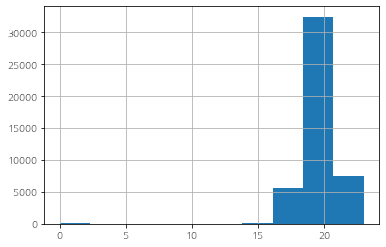

In [ ]:
main_yes['추정임대료'].hist() #-> 하방쪽 이상치. 임대료가 0인건 말이 안되기때문에 양수하한으로 대체

In [ ]:
main_yes.loc[main_yes['추정임대료']<10,'추정임대료']=14.836508

In [ ]:
main_yes['거주_유형_비'].describe()
#로그를 한번 더씌우기도 애매. 일단 그래도 간다

count    45702.000000
mean         0.050282
std          0.142655
min          0.000000
25%          0.000000
50%          0.000000
75%          0.033390
max          1.188532
Name: 거주_유형_비, dtype: float64

## **원핫인코딩**

In [ ]:
main_yes = main_yes[['행정동',  '상권코드','인허가일자', '사업장명', '시군구코드', '행정동코드', '소재지수정','폐업여부','사업기간','현재영업여부', #빼야하는 애들
                     '인허가분기', '인허가년도','다중이용업소여부','철도_역_수', '버스_터미널_수','가맹여부','코로나여부','상권여부','대학교_유무', 
                     '백화점_유무','폐업1년이내','폐업3년이내','시설총규모', '추정임대료','집객시설_수', '관공서_수', '은행_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
                     '지하철_역_수', '버스_정거장_수', '총_생활인구_수', '아파트_단지_수', '의료기관_수', '교육기관_수', '생활인구_성별_비','아파트_평당_가격', '총 상주인구 수', '상주인구_성별_비', '총 가구 수', 
                     '거주_유형_비', '점포당_매출_금액', '건수당_매출_금액', '점포수', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_율',
                     '폐업_률', '선행종합지수', '소비자물가지수', '소비자심리지수', '중소기업대출금리',#양적변수
                     '업종분류', '상권변화_지표명', '상권구분_코드명', '시군구', '생활인구_연령_대표', '상주인구_연령_대표']]#범주형변수

In [ ]:
#main_yes.loc[:,'인허가일자']=pd.to_datetime(main_yes['인허가일자'])
#datetime으로 바꾸니까 mi가 못알아 먹음

In [ ]:
for i in one_hot_list:
  main_yes=pd.get_dummies(data=main_yes, columns = [i], prefix=i)

In [ ]:
main_yes

,행정동,상권코드,인허가일자,사업장명,시군구코드,행정동코드,소재지수정,폐업여부,사업기간,현재영업여부,...,시군구_은평구,시군구_종로구,시군구_중구,시군구_중랑구,생활인구_연령_대표_노년층,생활인구_연령_대표_중장년층/자녀,생활인구_연령_대표_청년층,상주인구_연령_대표_노년층,상주인구_연령_대표_중장년층/자녀,상주인구_연령_대표_청년층
0,을지로6가,2120037.0,2017-01-02,면면,11140.0,11140590.0,서울특별시 중구 을지로6가 18-12,1,569.0,0,...,0,0,1,0,0,0,1,1,0,0
1,행당동,2110112.0,2017-01-02,백채왕십리역점,11200.0,11200560.0,서울특별시 성동구 행당동 286-43,0,2005.0,1,...,0,0,0,0,1,0,0,0,1,0
2,성수동2가,2120052.0,2017-01-02,우리푸드,11200.0,11200690.0,서울특별시 성동구 성수동2가 289-5,0,2005.0,1,...,0,0,0,0,0,0,1,0,0,1
3,장안동,2110229.0,2017-01-02,일촌김밥분식,11230.0,11230650.0,서울특별시 동대문구 장안동 374-1,1,261.0,0,...,0,0,0,0,1,0,0,0,1,0
4,장안동,2110226.0,2017-01-02,마마포차,11230.0,11230650.0,서울특별시 동대문구 장안동 390-25,0,2005.0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45697,명일동,2111080.0,2021-12-30,주식회사더크레스트명일지점,11740.0,11740530.0,서울특별시 강동구 명일동 326-11,0,182.0,1,...,0,0,0,0,1,0,0,1,0,0
45698,강일동,2111088.0,2021-12-30,곽만근족발슈바인학센강일고덕점,11740.0,11740560.0,서울특별시 강동구 강일동 679-3,0,182.0,1,...,0,0,0,0,1,0,0,0,1,0
45699,신사동,2120193.0,2021-12-31,마일하이(Milehigh),11680.0,11680545.0,서울특별시 강남구 신사동 648-4,0,181.0,1,...,0,0,0,0,0,0,1,0,0,1
45700,신사동,2120193.0,2021-12-31,우모크,11680.0,11680545.0,서울특별시 강남구 신사동 644-6,0,181.0,1,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
main_yes.columns

Index(['행정동', '상권코드', '인허가일자', '사업장명', '시군구코드', '행정동코드', '소재지수정', '폐업여부',
       '사업기간', '현재영업여부',
       ...
       '시군구_은평구', '시군구_종로구', '시군구_중구', '시군구_중랑구', '생활인구_연령_대표_노년층',
       '생활인구_연령_대표_중장년층/자녀', '생활인구_연령_대표_청년층', '상주인구_연령_대표_노년층',
       '상주인구_연령_대표_중장년층/자녀', '상주인구_연령_대표_청년층'],
      dtype='object', length=102)

In [ ]:
main_input = main_yes.iloc[:,11:]

In [ ]:
main_yes.to_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/모델링용 최종본/이상_o_로그_o_원핫_o.csv')
#main_yes.to_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/모델링용 최종본/이상_x_로그_x_원핫_o.csv')

# **중요도 파악**

In [ ]:
#1년
X = main_input.copy()
y = X.pop("폐업1년이내")
X.pop("폐업3년이내")
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

시설총규모             0.023438
추정임대료             0.019264
총 가구 수            0.017722
점포당_매출_금액         0.008625
상권변화_지표명_상권확장     0.005552
슈퍼마켓_수            0.004099
거주_유형_비           0.003559
버스_터미널_수          0.003221
점포수               0.002961
소비자물가지수           0.002452
상권구분_코드명_발달상권     0.001963
유사_업종_점포_수        0.001804
중소기업대출금리          0.001533
시군구_관악구           0.001271
아파트_단지_수          0.000877
대학교_유무            0.000744
선행종합지수            0.000484
다중이용업소여부          0.000371
시군구_성동구           0.000000
시군구_송파구           0.000000
시군구_용산구           0.000000
시군구_중랑구           0.000000
상주인구_연령_대표_노년층    0.000000
시군구_도봉구           0.000000
집객시설_수            0.000000
극장_수              0.000000
의료기관_수            0.000000
업종분류_일식음식점        0.000000
업종분류_패스트푸드점       0.000000
시군구_강동구           0.000000
Name: MI Scores, dtype: float64

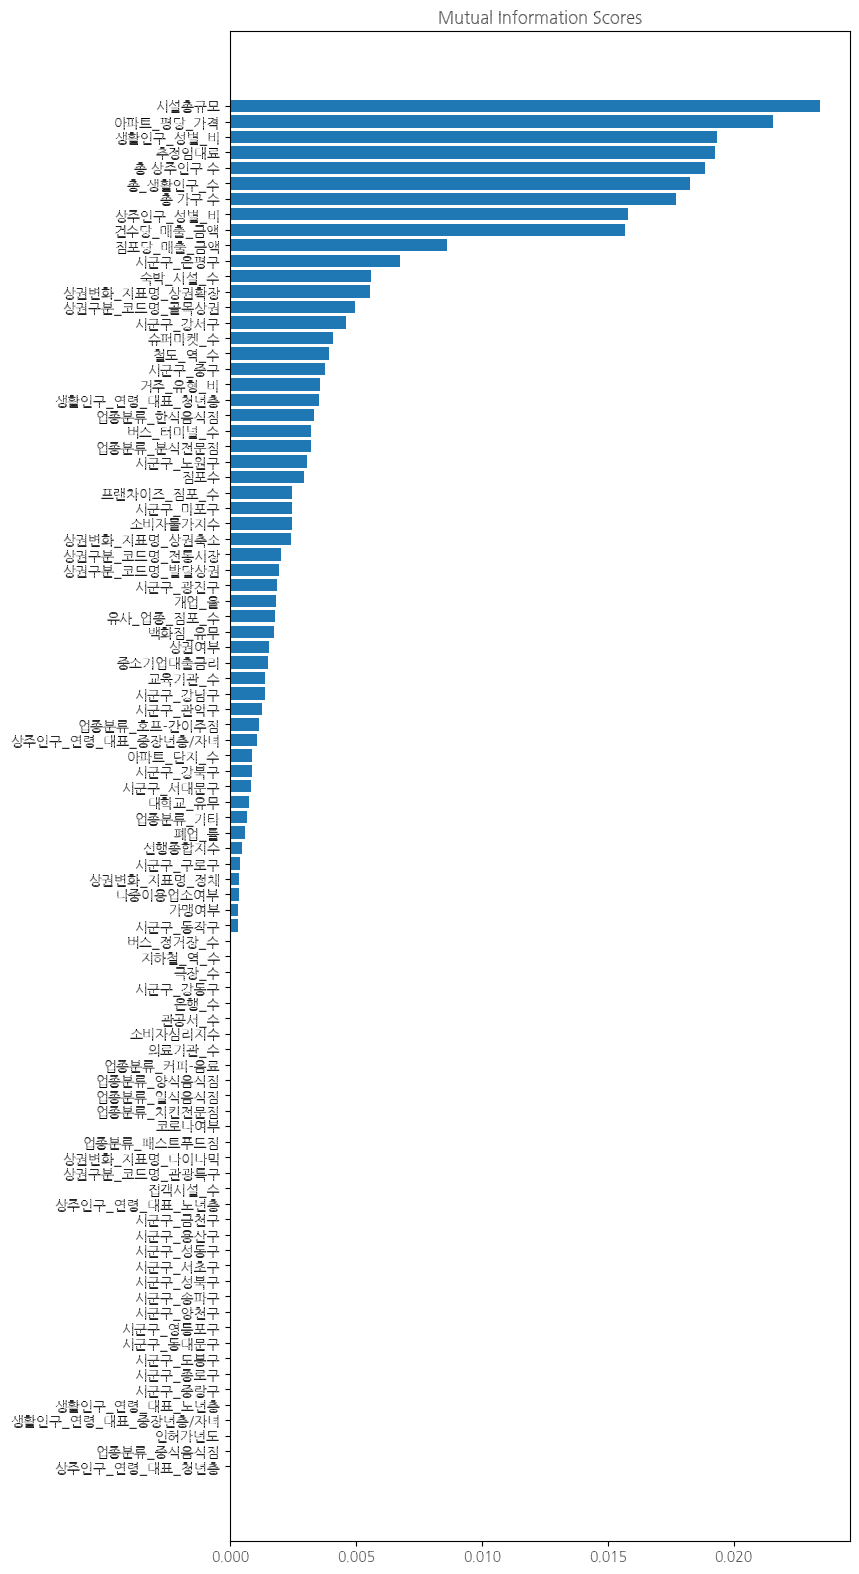

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 20))
plot_mi_scores(mi_scores)

In [ ]:
#3년

X = main_input.copy()
y = X.pop("폐업3년이내")
X.pop("폐업1년이내")
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

아파트_평당_가격             0.034275
총_생활인구_수              0.030410
소비자심리지수               0.019450
선행종합지수                0.017191
인허가년도                 0.015405
중소기업대출금리              0.012601
시군구_중랑구               0.009098
아파트_단지_수              0.006679
시군구_관악구               0.005986
다중이용업소여부              0.005262
업종분류_호프-간이주점          0.004731
시군구_성동구               0.003855
업종분류_커피-음료            0.003651
상권구분_코드명_발달상권         0.003133
대학교_유무                0.003019
시군구_용산구               0.002712
상권여부                  0.002172
생활인구_연령_대표_청년층        0.001974
프랜차이즈_점포_수            0.001365
상권구분_코드명_전통시장         0.000927
집객시설_수                0.000129
상주인구_연령_대표_중장년층/자녀    0.000000
시군구_동작구               0.000000
업종분류_중식음식점            0.000000
철도_역_수                0.000000
은행_수                  0.000000
지하철_역_수               0.000000
업종분류_치킨전문점            0.000000
상권구분_코드명_골목상권         0.000000
시군구_금천구               0.000000
Name: MI Scores, dtype: float64

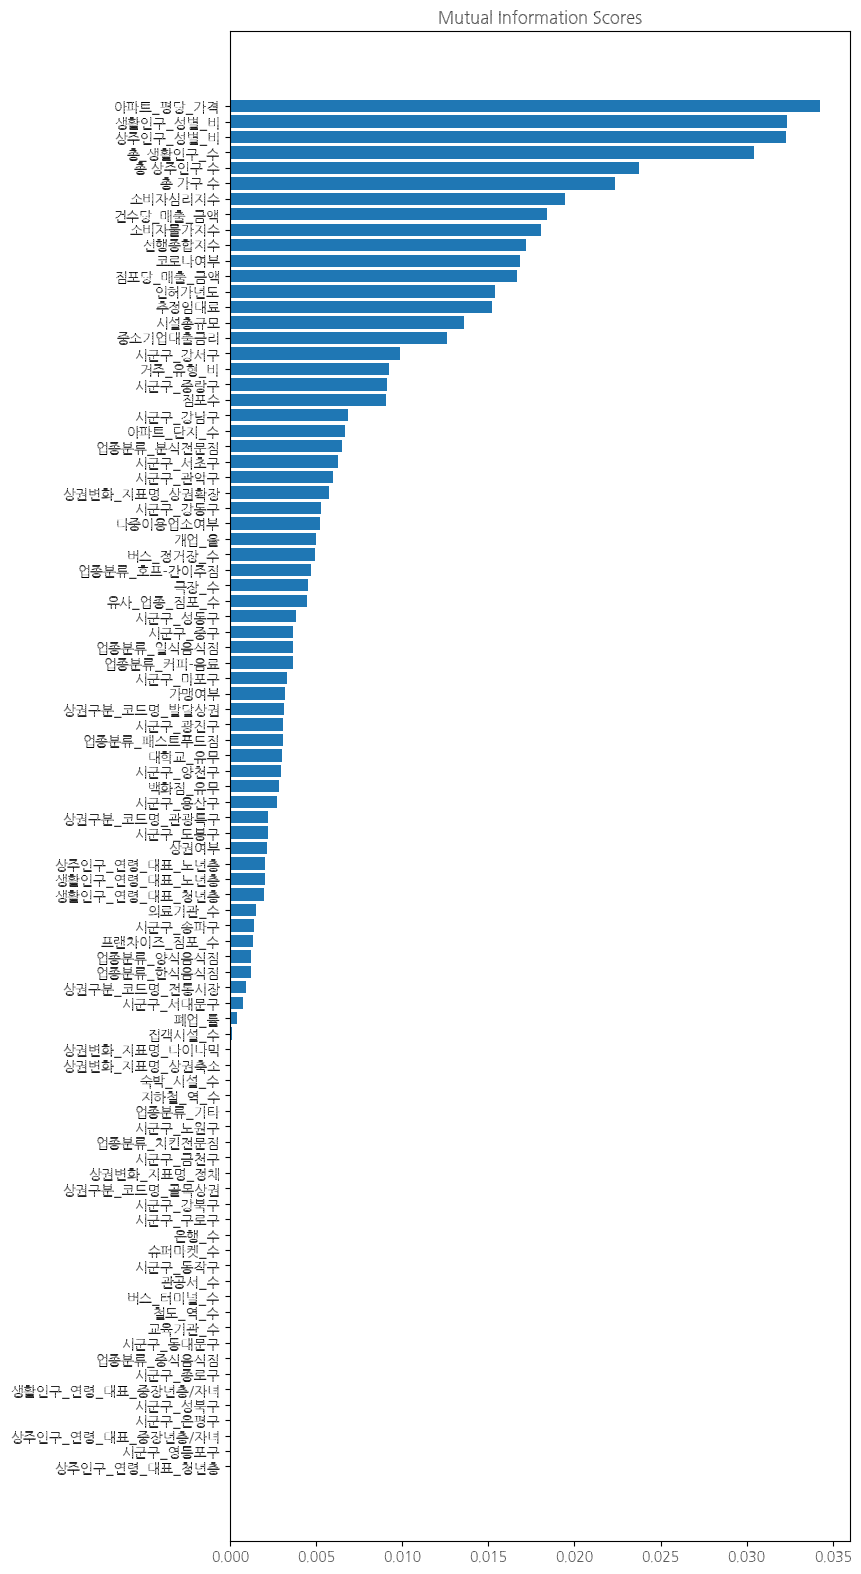

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 20))
plot_mi_scores(mi_scores)